# 🔢**Random Numbers**

Real-World ML Use Cases:
* Dataset shuffling (before splitting into train/test)
* Weight initialization (Neural networks)
* Monte Carlo simulations

In [5]:
!pip install numpy --upgrade

In [6]:
import numpy as np

## Generating Random Numbers

### rand
* Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).
* **Syntax**: `np.random.rand(d0, d1, ..., dn)`

In [7]:
np.random.rand(3,2)

array([[0.65473759, 0.17626375],
       [0.34277007, 0.58548578],
       [0.53218496, 0.47109441]])

In [8]:
np.random.rand(2,2,2)

array([[[0.15754866, 0.04937314],
        [0.83534023, 0.63499505]],

       [[0.62696522, 0.29651444],
        [0.12382881, 0.89623141]]])

### randn
* It draws numbers from a normal (or Gaussian) distribution with a mean of 0 and a standard deviation of 1.  This is also known as the [standard normal distribution]().
* **Syntax**: `np.random.randn(d0, d1, ..., dn)`


* Standard deviation measures the amount of variation or dispersion of a set of values.  A low standard deviation means the values are clustered closely around the average (mean), while a high standard deviation means the values are more spread out.  It's like measuring how "typical" the average is.  If the standard deviation is small, the average is a good representation of the data. If it's large, the average isn't as informative.

* The standard normal distribution is a bell-shaped curve. It's symmetrical, with the highest point in the middle (at 0).  It shows how likely different values are: values closer to 0 are much more common than values far away.  It's "standard" because its average (mean) is 0 and its spread (standard deviation) is 1.

For random samples from the normal distribution with *mean __mu__* and *standard deviation __sigma__*, use:
`sigma * np.random.randn(...) + mu`

In [10]:
np.random.randn(),np.random.randn(),np.random.randn()

(0.10419636261263085, -0.9391876432287543, 0.3019684244768988)

In [11]:
np.random.randn(3,2)

array([[ 2.45185051,  0.45182052],
       [-0.28279961, -2.26796675],
       [ 0.71621926, -0.47491501]])

In [14]:
2.5 * np.random.randn(3,2) + 3

array([[5.69005497, 2.05046416],
       [5.16328243, 2.76221685],
       [3.54545977, 6.29084389]])

### randint
* Return random integers from low (inclusive) to high (exclusive).

 If high is None (the default), then results are from [0, low).
* **Syntax**: `np.random.randint(low, high=None, size=None, dtype=int)`

In [19]:
np.random.randint(1,5, size=10)

array([2, 1, 4, 2, 3, 4, 4, 1, 3, 3])

- np.random.randint has a special capability. When you provide a list or array for the high parameter, it means you want each generated number to have a different upper bound.

- The number of upper bounds you provide should match the number of random integers you want to generate (in the corresponding dimension).
- The upper bounds apply to the corresponding output.

In [20]:
np.random.randint(1,5, size=(2,3))

array([[2, 2, 3],
       [1, 1, 3]])

⬆️ in above code `np.random.randint(1, [3, 5, 10])`:
  - It will generate a 1D array of size 3.
  - The first output will be between 1 and 3.
  - The second output will be between 1 and 5.
  - The third output will be between 1 and 10.

Same goes fo Lower bounds

In [21]:
np.random.randint([1, 5, 7], 10)

array([1, 6, 8])

In [22]:
np.random.randint([1, 3, 5, 7], [[10], [20]], dtype=np.uint8)

array([[ 7,  4,  6,  9],
       [ 7, 13, 17, 11]], dtype=uint8)

Above code will generate a array with shape `(2,4)` with every element have different `[lower, upper)` bounds, as we saw from above examples.

`dtype` is used for representing the data type of the elements within an array.

Number of bits | Min. value | Max. value
---------------|------------|------------
8bit           |0           |255
16 bit         |0           |65535
32 bit         |0           |4294967295
64 bit         |0           |2^64 - 1    

[If you want to learn more of dtype.](https://www.geeksforgeeks.org/data-type-object-dtype-numpy-python/)

### choice
* Generates a random sample from a given 1-D array
* **Syntax**: `random.choice(a, size=None, replace=True, p=None)`
  * `replace : (boolean, optional)` : Whether the sample is with or without replacement. Default is True, meaning that a value of a can be selected multiple times.
  * `p : (1-D array-like, optional)` : The probabilities associated with each entry in a. If not given, the sample assumes a uniform distribution over all entries in a.
    * Example: If you have an array `a = [1, 2, 3]` and you set `p = [0.2, 0.5, 0.3]`, this means:
        - The number 1 has a 20% chance of being selected.
        - The number 2 has a 50% chance of being selected.
        - The number 3 has a 30% chance of being selected.
    * In Simple Terms
        - **No p**: Every item in your list is equally likely to be picked.
        - **With p**: You can set the odds so that some items are more likely to be picked than others.


All values in p should be between 0 and 1, and they should add up to 1 to represent a valid probability distribution.

In [27]:
np.random.choice(6,9) # This is equal to np.random.randint(0,6,9)

array([2, 4, 0, 1, 1, 3, 2, 4, 5])

In [32]:
np.random.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])

array([2, 3, 3])

* The probability that 0 will be chosen is 0.1.
* The probability that 1 will be chosen is 0.
* The probability that 2 will be chosen is 0.3.
* The probability that 3 will be chosen is 0.6.
* The probability that 4 will be chosen is 0.

If you ran this code many times, you'd observe that the number 3 is selected roughly 60% of the time, the number 2 roughly 30%, the number 0 roughly 10%, and the numbers 1 and 4 will almost never be selected.

In [34]:
arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
np.random.choice(arr, 5, p=[0.5, 0.1, 0.1, 0.3])

array(['pooh', 'rabbit', 'Christopher', 'pooh', 'pooh'], dtype='<U11')

## Setting a Seed for Reproducibility


Reproducibility means generating the same sequence of "random" numbers each time you run your code. This is important when you're using NumPy's random number functions (like `np.random.rand, np.random.randint`, etc.) and you need to ensure that the "randomness" is the same every time to get consistent results.



### seed
* It ensures that the sequence of random numbers generated is reproducible across multiple runs
* **Syntax**: `np.random.seed(seed=None)`

**Why setting a seed is important for ML**

- Setting a seed is a best practice in machine learning for achieving reproducible, consistent, and more easily debuggable experiments. By controlling the randomness, you can get more reliable results and better understand the performance of your models.

 In essence, it makes randomness predictable.

In [60]:
np.random.seed(42)

## Random Sampling Techniques

### permutation
* Returns a randomly permuted sequence of elements. It can shuffle an array or generate a randomly permuted range of numbers.
* **Syntax**: `np.random.permutation(x)`

In [64]:
np.random.permutation(10)

array([1, 5, 4, 8, 0, 7, 6, 3, 2, 9])

In [67]:
np.random.permutation([1, 4, 9, 16, 25])

array([ 9, 16, 25,  1,  4])

In [82]:
arr = np.arange(9).reshape((3, 3))
arr,np.random.permutation(arr)

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([[6, 7, 8],
        [3, 4, 5],
        [0, 1, 2]]))

### shuffle
* Modify a sequence in-place by shuffling its contents.
* **Syntax**: `np.random.shuffle(x)`


In [77]:
arr = np.arange(10)
np.random.shuffle(arr)
arr

array([0, 2, 6, 8, 7, 1, 4, 5, 3, 9])

In [81]:
arr = np.arange(9).reshape((3, 3))
np.random.shuffle(arr)
arr

array([[6, 7, 8],
       [0, 1, 2],
       [3, 4, 5]])

**np.random.permutation()**
* Returns a new shuffled array.
* Does not modify the original array.

**np.random.shuffle()**
* Shuffles the array in place (modifies the original array).
* Only works on arrays and does not return anything.

* Use `np.random.permutation()` if you need to <ins>preserve the original array</ins> and want to get back a <ins>new shuffled array</ins>.
* Use `np.random.shuffle()` if you want to
<ins>shuffle the array</ins> in place and <ins>don't need a new array</ins>.

## Creating Random Matrices for ML

### normal
* It is used to generate random numbers following a normal (Gaussian) distribution. This distribution is also known as a bell curve, where most values are clustered around the mean.

* **Syntax**: `np.random.normal(loc=0.0, scale=1.0, size=None)`
  * `loc` → Mean (center of the distribution).
  * `scale` → Standard deviation (spread of values).
  * `size` → Number of random values to generate (can be a tuple for multiple dimensions).

* **[Gaussian Distribution](https://www.datacamp.com/tutorial/gaussian-distribution)** :
  \begin{align}
  f(x)= {\frac{1}{\sigma\sqrt{2\pi}}}e^{- {\frac {1}{2}} (\frac {x-\mu}{\sigma})^2}\\
  \\ f(x)	=	probability\;density\;function
  \\ \sigma	=	standard\;deviation
  \\ \mu	=	mean
  \end{align}


In [83]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [86]:
# Verify the mean and the standard deviation:

abs(mu - np.mean(s)) # may vary

0.003112911365678263

In [91]:
random_value = np.random.normal()
random_value

1.06240150987512


In [93]:
random_array = np.random.normal(loc=10, scale=2, size=5)
random_array
# Mean (loc) is 10.
# Standard deviation (scale) is 2.
# Generates 5 random numbers.

array([ 9.82631045, 11.61458625,  7.50846788, 12.2154409 ,  8.58384227])

In [94]:
random_matrix = np.random.normal(loc=5, scale=1.5, size=(3, 3))
random_matrix

array([[2.66615202, 4.59140604, 1.85726372],
       [5.38126084, 4.61112434, 6.85053038],
       [5.97338632, 2.91200549, 3.74241876]])

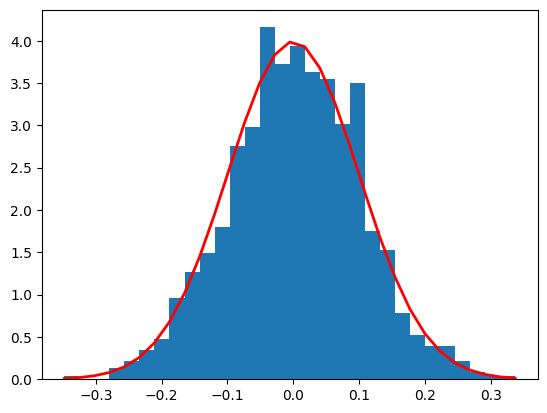

In [96]:
# just for visualisation of random.normal()
# Gaussian Standard Distribution
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

### uniform
* Draw samples from a uniform distribution.

  Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high). In other words, any value within the given interval is equally likely to be drawn by uniform.

* **Synatx**: `np.random.uniform(low=0.0, high=1.0, size=None)`

The probability density function of the uniform distribution is
\begin{align}
\\p(x) = \frac{1}{b - a}\\\\
\end{align}
The uniform distribution generates random numbers evenly spread between a given range [a, b).

* The probability is constant in this range.
* Outside [a, b), the probability is zero.
* If high == low, it just returns low.
* If high < low, the behavior is undefined (might cause an error).
* Due to floating-point rounding, sometimes b might be included in the output.


In [106]:
s = np.random.uniform(-1,0,1000)

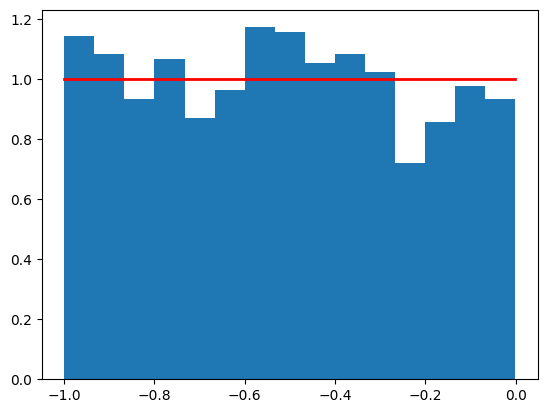

In [108]:
# Display the histogram of the samples, along with the probability density function
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

## References
* [numpy](https://numpy.org/doc/stable/reference/random/legacy.html)
* https://www.datacamp.com/tutorial/gaussian-distribution
* https://www.geeksforgeeks.org/data-type-object-dtype-numpy-python/

**Real-World ML Use Cases**
* Dataset shuffling (before splitting into train/test)
* Weight initialization (Neural networks)
* Monte Carlo simulations